<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-08-17 21:04:35.344013


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print(us['confirmed'].sum())
    print('US Deaths')
    print(us['deaths'].sum())
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('')

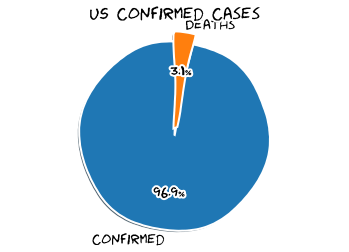

US Population
330362592
US Confirmed
5414690
US Deaths
169884
5414690 (1.639014262244316% of population)

New York City Confirmed
230458
New York City Deaths
23634

Philippines Confirmed
164474
Philippines Deaths
2681



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

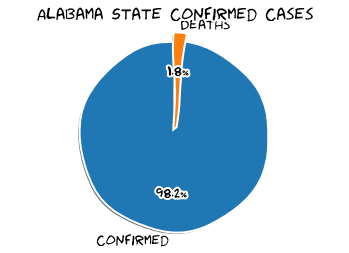

Alabama State Total Population
4887871
Alabama State Confirmed
109004 (2.23009158793266% of population)
Alabama State Deaths
1925 (1.7659902388903157% of confirmed)



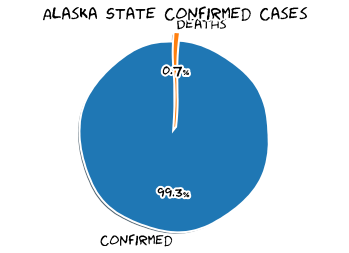

Alaska State Total Population
737438
Alaska State Confirmed
4273 (0.5794385426300245% of population)
Alaska State Deaths
28 (0.6552773227240815% of confirmed)



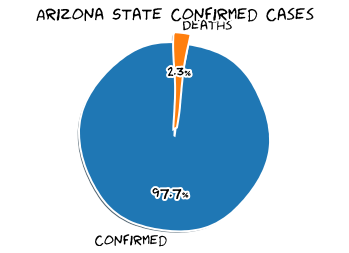

Arizona State Total Population
7171646
Arizona State Confirmed
194005 (2.7051669867698434% of population)
Arizona State Deaths
4505 (2.322105100384011% of confirmed)



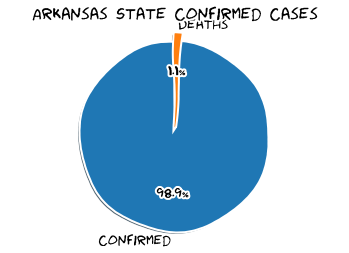

Arkansas State Total Population
3013825
Arkansas State Confirmed
52665 (1.7474471809079821% of population)
Arkansas State Deaths
599 (1.1373777651191492% of confirmed)



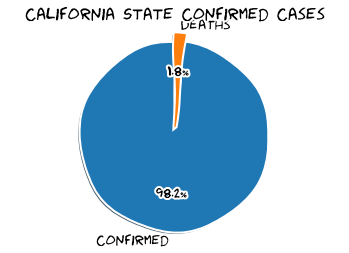

California State Total Population
39557045
California State Confirmed
625308 (1.5807753081657137% of population)
California State Deaths
11246 (1.7984737121546504% of confirmed)



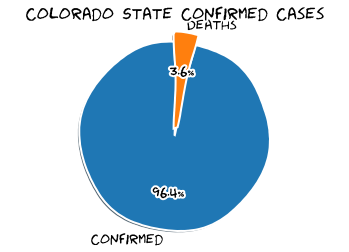

Colorado State Total Population
5695564
Colorado State Confirmed
53157 (0.9333052881154525% of population)
Colorado State Deaths
1896 (3.5667927083921214% of confirmed)



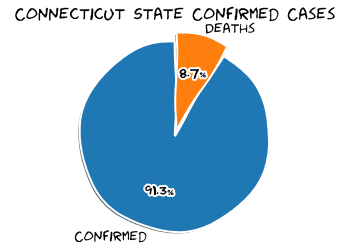

Connecticut State Total Population
3572665
Connecticut State Confirmed
50897 (1.4246227955881674% of population)
Connecticut State Deaths
4453 (8.749042183232804% of confirmed)



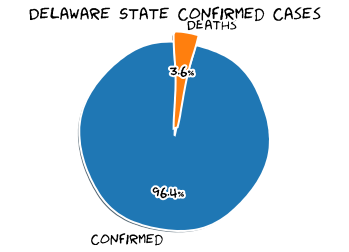

Delaware State Total Population
967171
Delaware State Confirmed
16536 (1.7097286829319738% of population)
Delaware State Deaths
593 (3.586115142718916% of confirmed)



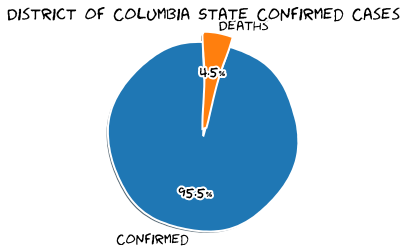

District of Columbia State Total Population
702455
District of Columbia State Confirmed
13273 (1.8895160544091794% of population)
District of Columbia State Deaths
597 (4.497852783846907% of confirmed)



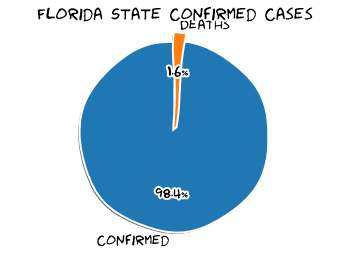

Florida State Total Population
21299325
Florida State Confirmed
573416 (2.6921792122520314% of population)
Florida State Deaths
9452 (1.6483669796447955% of confirmed)



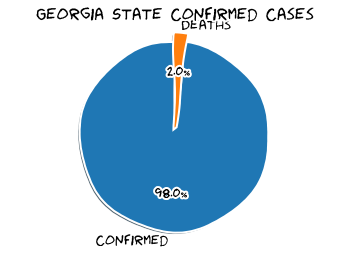

Georgia State Total Population
10519475
Georgia State Confirmed
237030 (2.2532493304085994% of population)
Georgia State Deaths
4702 (1.9837151415432643% of confirmed)



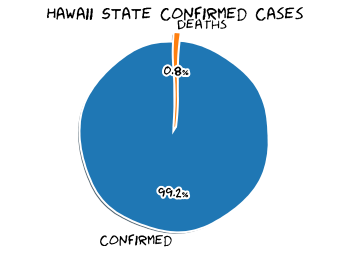

Hawaii State Total Population
1420491
Hawaii State Confirmed
5042 (0.3549476906224679% of population)
Hawaii State Deaths
40 (0.7933359777865925% of confirmed)



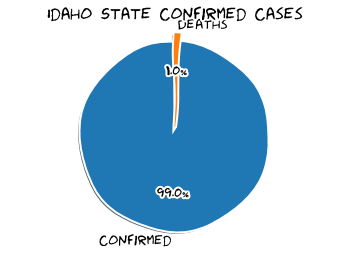

Idaho State Total Population
1754208
Idaho State Confirmed
27656 (1.5765519254273153% of population)
Idaho State Deaths
269 (0.9726641596760196% of confirmed)



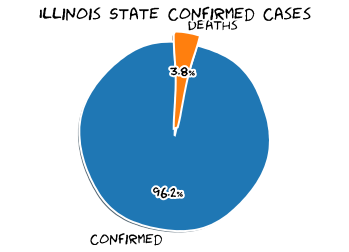

Illinois State Total Population
12741080
Illinois State Confirmed
209181 (1.641783899010131% of population)
Illinois State Deaths
7966 (3.8081852558310745% of confirmed)



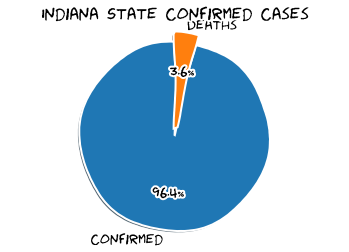

Indiana State Total Population
6691878
Indiana State Confirmed
81006 (1.2105122059906053% of population)
Indiana State Deaths
2926 (3.612078117670296% of confirmed)



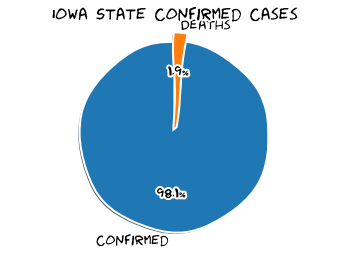

Iowa State Total Population
3156145
Iowa State Confirmed
52649 (1.668142623358559% of population)
Iowa State Deaths
979 (1.8594845106269826% of confirmed)



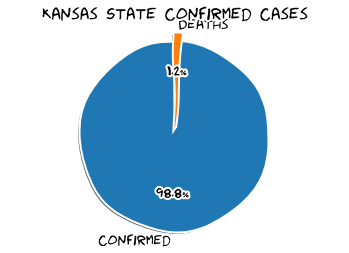

Kansas State Total Population
2911510
Kansas State Confirmed
33885 (1.163829078382008% of population)
Kansas State Deaths
405 (1.1952191235059761% of confirmed)



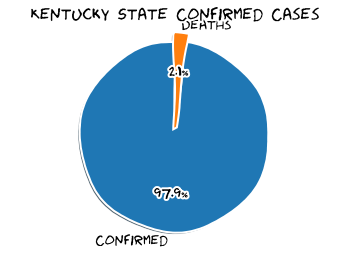

Kentucky State Total Population
4468402
Kentucky State Confirmed
39315 (0.8798447409163276% of population)
Kentucky State Deaths
813 (2.0679130103014116% of confirmed)



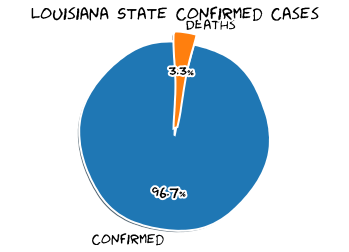

Louisiana State Total Population
4659978
Louisiana State Confirmed
138485 (2.971795145813993% of population)
Louisiana State Deaths
4526 (3.268223995378561% of confirmed)



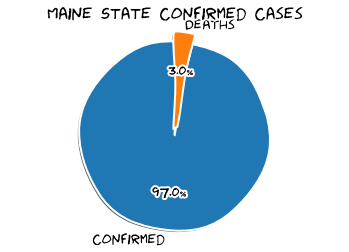

Maine State Total Population
1338404
Maine State Confirmed
4197 (0.31358244595802165% of population)
Maine State Deaths
127 (3.025970931617822% of confirmed)



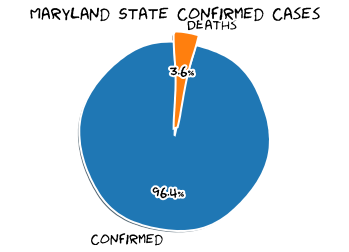

Maryland State Total Population
6042718
Maryland State Confirmed
100715 (1.666716864828046% of population)
Maryland State Deaths
3632 (3.606215558754902% of confirmed)



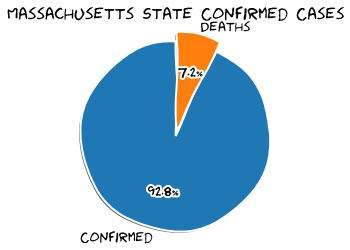

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
123593 (1.7906452033996947% of population)
Massachusetts State Deaths
8838 (7.150890422596749% of confirmed)



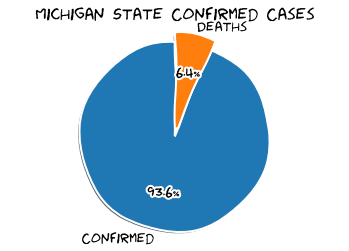

Michigan State Total Population
9995915
Michigan State Confirmed
102259 (1.0230078987266298% of population)
Michigan State Deaths
6592 (6.446376358071173% of confirmed)



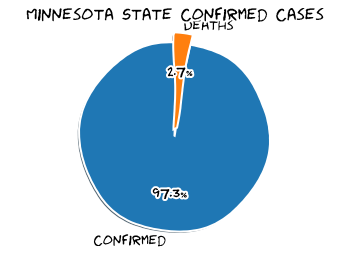

Minnesota State Total Population
5611179
Minnesota State Confirmed
65716 (1.1711620677223094% of population)
Minnesota State Deaths
1758 (2.675147604845091% of confirmed)



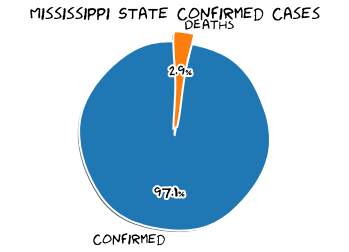

Mississippi State Total Population
2986530
Mississippi State Confirmed
72412 (2.424619876579174% of population)
Mississippi State Deaths
2095 (2.893166878417942% of confirmed)



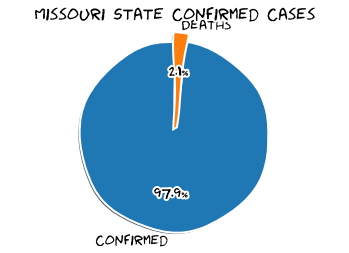

Missouri State Total Population
6126452
Missouri State Confirmed
68346 (1.1155885984253202% of population)
Missouri State Deaths
1406 (2.0571796447487785% of confirmed)



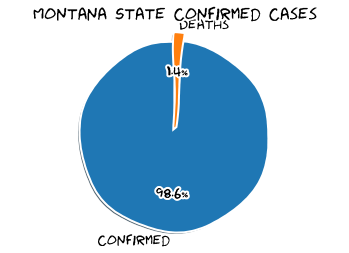

Montana State Total Population
1062305
Montana State Confirmed
5792 (0.5452294774099717% of population)
Montana State Deaths
82 (1.4157458563535912% of confirmed)



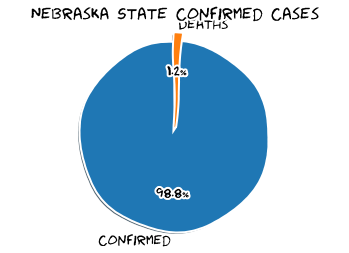

Nebraska State Total Population
1929268
Nebraska State Confirmed
30372 (1.5742758393338823% of population)
Nebraska State Deaths
361 (1.188594758330041% of confirmed)



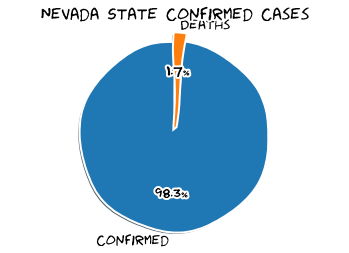

Nevada State Total Population
3034392
Nevada State Confirmed
61309 (2.0204706577133082% of population)
Nevada State Deaths
1072 (1.7485197931788155% of confirmed)



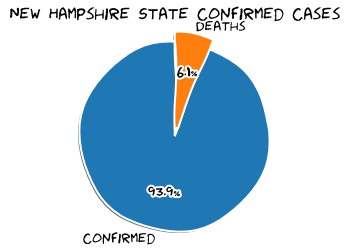

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6988 (0.5151652318022379% of population)
New Hampshire State Deaths
423 (6.053234115626789% of confirmed)



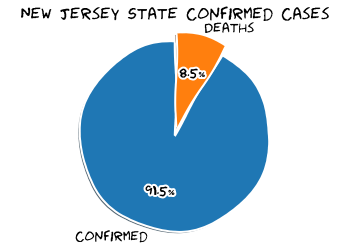

New Jersey State Total Population
8908520
New Jersey State Confirmed
187455 (2.104221576647973% of population)
New Jersey State Deaths
15912 (8.488437224933984% of confirmed)



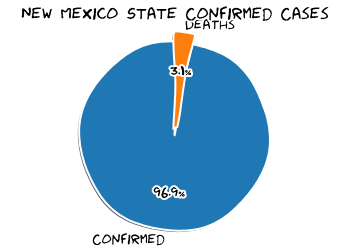

New Mexico State Total Population
2095428
New Mexico State Confirmed
23408 (1.1170987502314564% of population)
New Mexico State Deaths
714 (3.050239234449761% of confirmed)



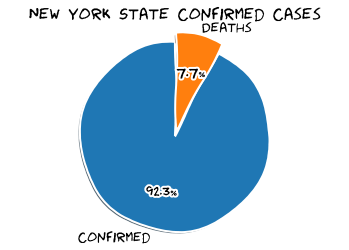

New York State Total Population
19542209
New York State Confirmed
425916 (2.1794670193118906% of population)
New York State Deaths
32846 (7.711849284835508% of confirmed)



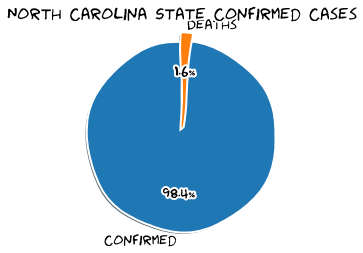

North Carolina State Total Population
10383620
North Carolina State Confirmed
145516 (1.4013995119235874% of population)
North Carolina State Deaths
2348 (1.6135682674070204% of confirmed)



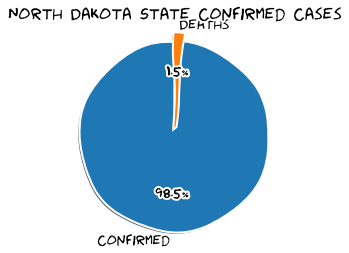

North Dakota State Total Population
760077
North Dakota State Confirmed
8647 (1.1376478961999903% of population)
North Dakota State Deaths
126 (1.457152769746733% of confirmed)



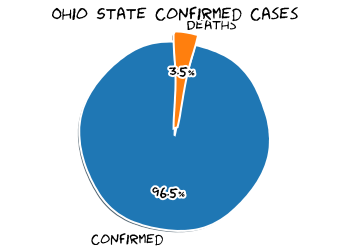

Ohio State Total Population
11689442
Ohio State Confirmed
107845 (0.9225846708508413% of population)
Ohio State Deaths
3770 (3.4957578005470813% of confirmed)



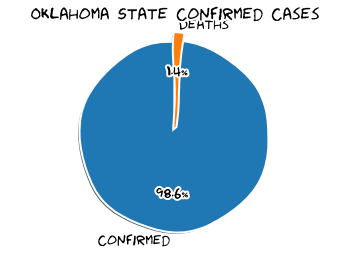

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
48459 (1.228963457237352% of population)
Oklahoma State Deaths
661 (1.3640397036670173% of confirmed)



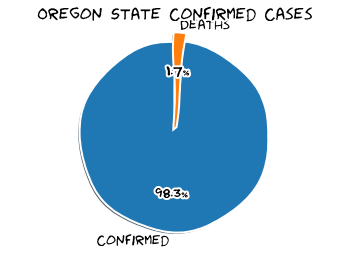

Oregon State Total Population
4190713
Oregon State Confirmed
23262 (0.5550845405065916% of population)
Oregon State Deaths
388 (1.6679563236179176% of confirmed)



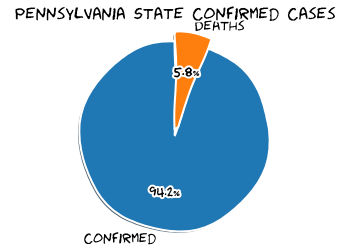

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
129431 (1.0106222661563231% of population)
Pennsylvania State Deaths
7453 (5.758280473765945% of confirmed)



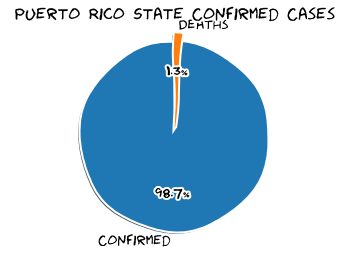

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
26760 (0.8375185789225116% of population)
Puerto Rico State Deaths
335 (1.2518684603886399% of confirmed)



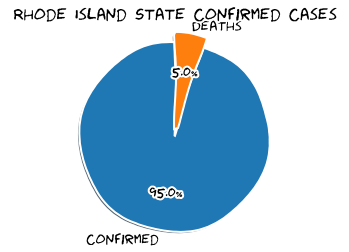

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
20572 (1.9456831691596166% of population)
Rhode Island State Deaths
1023 (4.972778533929613% of confirmed)



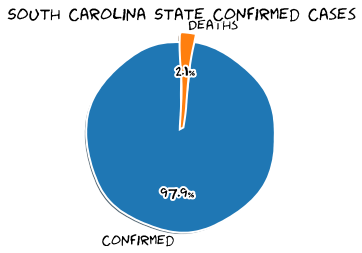

South Carolina State Total Population
5084127
South Carolina State Confirmed
106497 (2.094695903544502% of population)
South Carolina State Deaths
2269 (2.130576448162859% of confirmed)



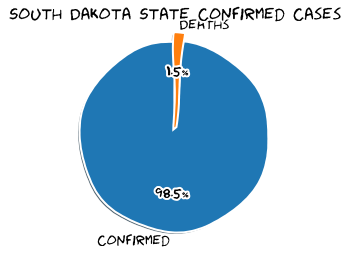

South Dakota State Total Population
882235
South Dakota State Confirmed
10958 (1.2420726903829478% of population)
South Dakota State Deaths
162 (1.4783719656871692% of confirmed)



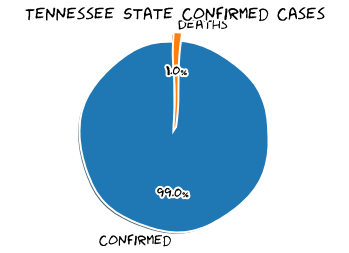

Tennessee State Total Population
6770010
Tennessee State Confirmed
133708 (1.9750044682356451% of population)
Tennessee State Deaths
1366 (1.0216292218864989% of confirmed)



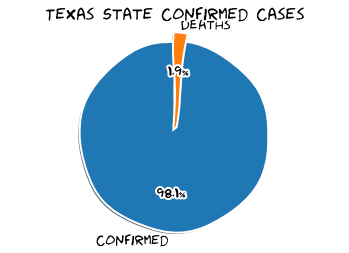

Texas State Total Population
28701845
Texas State Confirmed
555537 (1.9355445616823588% of population)
Texas State Deaths
10399 (1.871882520876197% of confirmed)



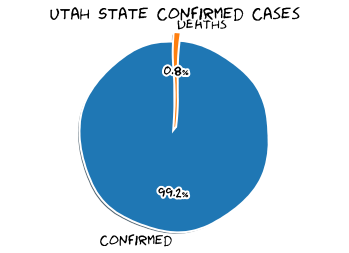

Utah State Total Population
3161105
Utah State Confirmed
46652 (1.47581304638726% of population)
Utah State Deaths
363 (0.7781016891022893% of confirmed)



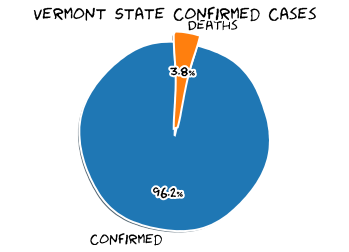

Vermont State Total Population
626299
Vermont State Confirmed
1515 (0.24189724077477373% of population)
Vermont State Deaths
58 (3.828382838283828% of confirmed)



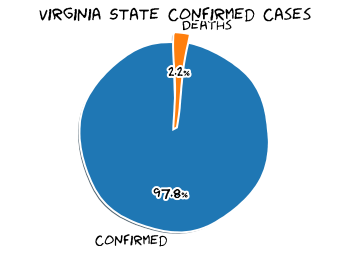

Virginia State Total Population
8517685
Virginia State Confirmed
107421 (1.261152531468351% of population)
Virginia State Deaths
2385 (2.220236266651772% of confirmed)



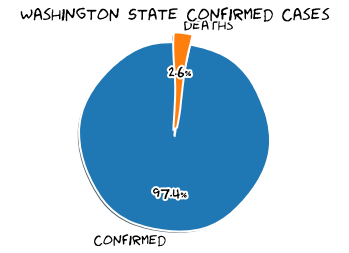

Washington State Total Population
7535591
Washington State Confirmed
67461 (0.8952317077718257% of population)
Washington State Deaths
1781 (2.6400438772031247% of confirmed)



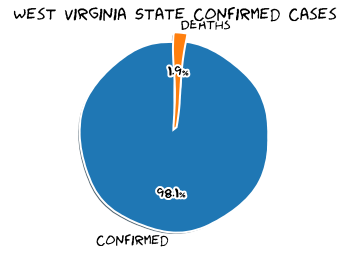

West Virginia State Total Population
1805832
West Virginia State Confirmed
8641 (0.47850519871172953% of population)
West Virginia State Deaths
160 (1.8516375419511633% of confirmed)



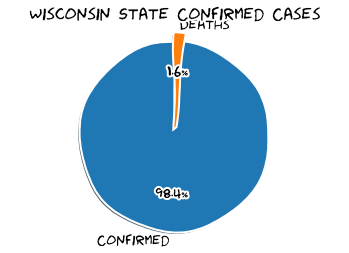

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
65741 (1.1308201779010756% of population)
Wisconsin State Deaths
1039 (1.5804444714865913% of confirmed)



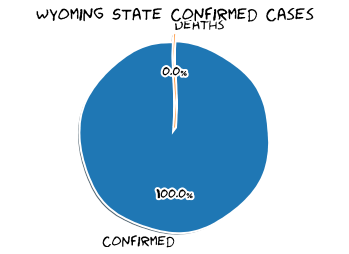

Wyoming State Total Population
577737
Wyoming State Confirmed
3286 (0.5687709113316267% of population)
Wyoming State Deaths
1 (0.030432136335970784% of confirmed)



In [12]:
for i in states:
    state_details(i)

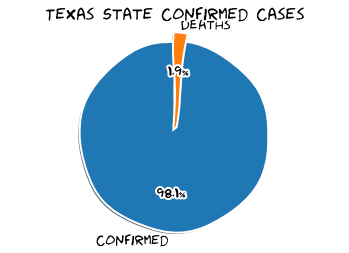

Texas State Total Population
28701845
Texas State Confirmed
555537 (1.9355445616823588% of population)
Texas State Deaths
10399 (1.871882520876197% of confirmed)



In [13]:
state_details('Texas')

In [14]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 21766459},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 776751},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-08-17T20:27:42.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 13725182},
 'source': 'https://github.com/mathdroid/covid19'}

In [15]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [16]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-08-17 04:27:20,33.93911,67.709953,37596,1375,27166,9055,Afghanistan,96.57745240158064,3.657303968507288
1,,,,Albania,2020-08-17 04:27:20,41.1533,20.1683,7380,228,3794,3358,Albania,256.445896170686,3.089430894308943
2,,,,Algeria,2020-08-17 04:27:20,28.0339,1.6596,38583,1370,27017,10196,Algeria,87.98650467675306,3.5507866158670915
3,,,,Andorra,2020-08-17 04:27:20,42.5063,1.5218,989,53,863,73,Andorra,1280.0103539765742,5.358948432760364
4,,,,Angola,2020-08-17 04:27:20,-11.2027,17.8739,1906,88,628,1190,Angola,5.799258984926428,4.616998950682056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,,,,West Bank and Gaza,2020-08-17 04:27:20,31.9522,35.2332,16534,110,9838,6586,West Bank and Gaza,324.10609132836845,0.6652957542034595
3941,,,,Western Sahara,2020-08-17 04:27:20,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3942,,,,Yemen,2020-08-17 04:27:20,15.552727,48.516388,1869,530,1013,326,Yemen,6.266351522941352,28.35741037988229
3943,,,,Zambia,2020-08-17 04:27:20,-13.133897,27.849332,9343,260,8412,671,Zambia,50.8214880409853,2.78283206678797


In [17]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597685258000,40.767273,-73.971526,230458,0,23634,206824,New York City,36061,"New York City, New York, US",2764.340395,None,None,84036061,USA
1,California,US,1597685258000,34.308284,-118.228241,221971,0,5254,216717,Los Angeles,06037,"Los Angeles, California, US",2211.063195,None,None,84006037,USA
2,Florida,US,1597685258000,25.611236,-80.551706,145307,0,2057,143250,Miami-Dade,12086,"Miami-Dade, Florida, US",5348.185827,None,None,84012086,USA
3,Arizona,US,1597685258000,33.348359,-112.491815,129562,0,2596,126966,Maricopa,04013,"Maricopa, Arizona, US",2888.518206,None,None,84004013,USA
4,Illinois,US,1597685258000,41.841448,-87.816588,116620,0,4964,111656,Cook,17031,"Cook, Illinois, US",2264.363573,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,Montana,US,1597685258000,46.860480,-105.379384,1,0,0,1,Prairie,30079,"Prairie, Montana, US",92.850511,None,None,84030079,USA
3211,Nebraska,US,1597685258000,41.568961,-101.695956,1,0,0,1,Arthur,31005,"Arthur, Nebraska, US",215.982721,None,None,84031005,USA
3212,Nebraska,US,1597685258000,40.176092,-101.041648,1,0,0,1,Hitchcock,31087,"Hitchcock, Nebraska, US",36.205648,None,None,84031087,USA
3213,Nebraska,US,1597685258000,41.914827,-98.527989,1,0,0,1,Wheeler,31183,"Wheeler, Nebraska, US",127.713921,None,None,84031183,USA


In [18]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597685258000,40.767273,-73.971526,230458,0,23634,206824,New York City,36061,"New York City, New York, US",2764.340395,None,None,84036061,USA
10,New York,US,1597685258000,40.883201,-72.801217,44185,0,1998,42187,Suffolk,36103,"Suffolk, New York, US",2992.345258,None,None,84036103,USA
12,New York,US,1597685258000,40.740665,-73.589419,43955,0,2195,41760,Nassau,36059,"Nassau, New York, US",3239.311855,None,None,84036059,USA
16,New York,US,1597685258000,41.162784,-73.757417,36486,0,1447,35039,Westchester,36119,"Westchester, New York, US",3771.139404,None,None,84036119,USA
72,New York,US,1597685258000,41.150279,-74.025605,14011,0,674,13337,Rockland,36087,"Rockland, New York, US",4300.636301,None,None,84036087,USA
92,New York,US,1597685258000,41.403375,-74.302408,11256,0,491,10765,Orange,36071,"Orange, New York, US",2924.092066,None,None,84036071,USA
124,New York,US,1597685258000,42.762490,-78.730637,9157,0,674,8483,Erie,36029,"Erie, New York, US",996.732346,None,None,84036029,USA
204,New York,US,1597685258000,43.146389,-77.693229,5183,0,285,4898,Monroe,36055,"Monroe, New York, US",698.734109,None,None,84036055,USA
218,New York,US,1597685258000,41.764861,-73.743567,4700,0,153,4547,Dutchess,36027,"Dutchess, New York, US",1597.454948,None,None,84036027,USA
271,New York,US,1597685258000,43.004919,-76.199712,3680,0,203,3477,Onondaga,36067,"Onondaga, New York, US",799.082792,None,None,84036067,USA


In [19]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

425916

In [20]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597685258000,40.767273,-73.971526,230458,0,23634,206824,New York City,36061,"New York City, New York, US",2764.340395,None,None,84036061,USA


In [21]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
24,None,Philippines,1597696062000,12.879721,121.774017,164474,112759,2681,49034.0,None,None,Philippines,150.093422,None,None,608,PHL,PH


In [22]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
